### Question 1.

* You collected data about coral cover (number of coral heads from a species X) in 100 quadrats in 2018 in region Y.
 * Quadrat size in not relevant or important
* You hypothesize that the environmental stressor that occurred earlier caused a deciline in species X's coverage in the region Y
* You re-assessed the coral coverage in 25 of the quadrats you initially sampled in 2018 

* Use sampling to conclude whether the average coverage has decrease between 2018 and after the stressor event.
  * Plot your result and compute the p-value of the event.
  * i.e., what does the null distrubution for averages look like and where does your actual observer value occur

* Use the data is below. 


In [3]:
library(ggplot2)
library(magrittr)

In [6]:
library(tidyverse)
cover_data = read_csv("survey_2018.csv")
head(cover_data)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
Parsed with column specification:
cols(
  transect_id = col_double(),
  coverage = col_double()
)


transect_id,coverage
1,26
2,32
3,21
4,21
5,26
6,23


In [7]:
cover_tbl = read_csv("survey_2018.csv", 
                    col_types = cols(
                        transect_id = col_double(),
                        coverage = col_double()))
head(cover_tbl)

transect_id,coverage
1,26
2,32
3,21
4,21
5,26
6,23


## Mean and SD 2018 Data

In [8]:
mean(cover_tbl$coverage)
sd(cover_tbl$coverage)

[1] 20.81

[1] 5.882168

In [9]:
set.seed(32)
random_sample = sample(cover_tbl$coverage, 50)
mean(random_sample)

[1] 21.64

In [10]:
random_sample = sample(cover_tbl$coverage, 50)
mean(random_sample)

[1] 20.92

In [11]:
n = 2

n %>%
    replicate(sample(cover_tbl$coverage, 20)) %>%
    t() %>%
    apply( 1, mean)

[1] 20.15 20.00

## Samples Mean 2018

In [26]:
set.seed(42)
n = 1000

samples_means = n %>%
    replicate(sample(cover_tbl$coverage, 20)) %>%
    t() %>%
    apply( 1, mean)

## Plot 2018

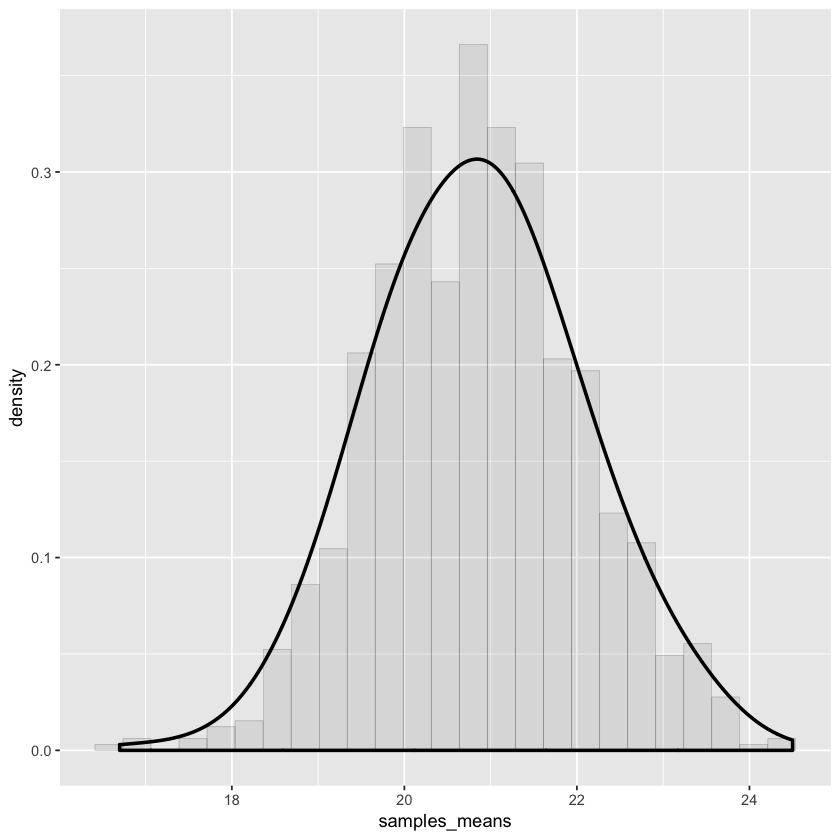

In [13]:
ggplot() + 
  geom_histogram(aes(x=samples_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=samples_means), color="black", size=1, bw=0.5)

In [14]:
mean(samples_means)

[1] 20.8449

In [15]:
library(tidyverse)
cover_data = read_csv("resample_2021.csv")
head(cover_data)

Parsed with column specification:
cols(
  experiment_id = col_double(),
  transect_id = col_double(),
  coverage = col_double()
)


experiment_id,transect_id,coverage
1,46,24
2,20,22
3,10,26
4,18,21
5,11,30
6,56,21


In [16]:
resample_tbl = read_csv("resample_2021.csv", 
                    col_types = cols(
                        experiment_id = col_integer(),
                        transect_id = col_double(),
                        coverage = col_double()))
head(resample_tbl)

experiment_id,transect_id,coverage
1,46,24
2,20,22
3,10,26
4,18,21
5,11,30
6,56,21


## Mean and SD 2021 Data

In [54]:
mean(resample_tbl$coverage)
sd(resample_tbl$coverage)

[1] 23.68

[1] 5.885859

In [17]:
set.seed(32)
random_sample = sample(resample_tbl$coverage, 20)
mean(random_sample)

[1] 23.45

In [28]:
n = 1000

n %>%
    replicate(sample(resample_tbl$coverage, 20)) %>%
    t() %>%
    apply( 1, mean)

[1] 24.60 23.95 23.00 24.35 23.45 23.95 22.70 24.30 23.80 24.00 23.85 23.65
  [13] 23.40 24.20 23.35 22.70 23.85 24.00 23.60 23.50 24.10 23.95 22.75 22.75
  [25] 23.70 23.30 23.25 23.95 23.55 23.95 22.80 24.20 24.00 23.15 23.40 24.55
  [37] 23.15 24.35 24.10 23.35 23.80 23.45 23.50 24.05 22.55 23.35 23.15 24.30
  [49] 23.90 24.55 22.90 25.05 24.35 23.60 23.50 24.50 23.55 23.45 23.60 24.25
  [61] 22.70 23.50 24.25 23.25 24.00 23.75 23.55 23.50 23.55 24.50 24.00 24.20
  [73] 23.65 23.65 23.95 23.75 23.60 23.30 22.70 24.60 24.70 23.60 23.60 23.00
  [85] 23.30 23.65 22.60 22.65 24.20 23.90 23.60 24.95 22.20 23.25 24.10 23.85
  [97] 23.00 23.95 23.40 23.05 23.55 24.75 24.35 23.70 23.35 24.20 23.75 23.80
 [109] 23.35 23.20 24.50 23.90 23.75 23.85 23.60 24.55 23.15 24.30 23.20 24.70
 [121] 22.90 23.00 24.40 23.05 23.90 23.70 23.05 23.30 23.65 24.00 24.05 24.85
 [133] 23.35 23.60 24.00 23.85 23.50 24.10 23.35 23.15 24.10 22.90 24.20 23.40
 [145] 23.80 22.80 23.90 23.55 23.40 24.40 23.45 22.50 22.70 24.95 23.85 24.10
 [157] 22.50 24.80 23.20 24.50 22.75 23.90 23.50 23.90 23.90 23.30 23.05 23.55
 [169] 23.05 23.45 23.90 23.55 23.25 23.65 23.85 23.40 23.35 22.90 23.00 23.95
 [181] 23.40 25.10 24.00 25.15 24.75 23.90 24.50 23.80 22.80 23.00 24.25 23.75
 [193] 23.25 23.40 24.40 23.15 24.30 23.15 23.60 23.25 23.60 24.10 23.75 23.35
 [205] 24.05 23.85 23.65 24.00 24.35 24.25 23.65 23.75 23.25 23.25 23.05 24.10
 [217] 23.25 23.70 24.35 24.00 23.30 23.75 24.45 22.95 23.70 23.50 22.35 23.20
 [229] 22.80 23.65 23.55 23.70 23.90 24.20 22.95 24.70 23.65 24.90 24.30 24.15
 [241] 23.40 22.55 23.05 23.60 23.95 22.90 23.90 23.70 23.30 22.75 23.65 24.25
 [253] 23.50 23.80 24.05 25.10 24.65 22.95 22.80 23.20 24.05 24.55 22.80 23.85
 [265] 23.75 24.05 23.40 23.15 23.20 24.15 23.25 24.05 23.85 23.95 22.55 23.50
 [277] 23.85 24.10 23.70 23.30 23.90 24.15 23.70 25.00 24.55 23.00 24.40 24.30
 [289] 24.40 22.35 23.85 23.50 23.15 23.35 24.35 24.30 23.95 24.15 24.60 23.30
 [301] 24.35 23.65 23.65 23.45 24.50 24.40 23.05 23.15 22.60 23.40 23.00 23.80
 [313] 23.50 22.80 22.55 24.10 23.80 23.60 23.85 24.00 24.00 23.30 23.55 23.50
 [325] 23.75 23.60 24.00 23.35 23.20 23.85 23.55 23.75 23.50 23.90 24.25 23.50
 [337] 23.50 23.40 23.45 23.75 23.45 22.55 23.85 22.65 23.50 24.20 24.15 22.75
 [349] 24.70 23.75 23.85 23.85 24.55 24.05 23.60 22.75 22.50 23.80 23.50 23.85
 [361] 24.20 23.65 24.00 24.50 23.75 23.60 22.90 24.10 24.05 23.35 23.35 23.30
 [373] 24.75 24.65 24.05 23.70 23.20 23.65 23.90 24.35 23.45 23.10 23.70 23.10
 [385] 23.90 24.40 22.85 23.85 23.50 22.95 22.90 24.20 23.50 23.25 24.45 23.40
 [397] 23.50 23.95 24.35 24.20 23.50 23.95 23.80 22.25 23.80 24.00 24.15 24.30
 [409] 23.65 23.90 22.70 22.85 22.55 23.85 23.40 23.30 22.95 23.40 24.10 23.70
 [421] 24.15 23.60 24.10 24.40 23.85 24.10 23.40 24.25 23.30 23.30 23.15 23.55
 [433] 23.50 23.60 23.40 24.55 23.45 22.90 23.00 23.20 24.40 23.75 24.50 24.55
 [445] 22.40 23.50 23.85 22.15 23.75 24.45 23.20 24.70 23.10 23.50 23.60 24.20
 [457] 24.15 24.50 23.65 23.55 23.45 23.15 23.50 22.65 24.35 23.95 23.70 24.30
 [469] 23.05 24.30 23.90 24.45 24.30 23.55 23.50 24.35 23.45 23.40 23.30 23.80
 [481] 23.95 23.40 22.90 23.00 23.35 23.40 23.30 23.40 23.60 24.15 24.15 24.15
 [493] 23.85 24.60 24.45 24.20 24.05 23.75 24.15 23.80 23.90 24.45 23.20 22.80
 [505] 24.25 23.40 23.75 24.55 22.90 23.00 24.25 25.30 23.50 23.05 23.40 23.35
 [517] 24.00 24.60 23.40 24.20 23.90 23.80 23.80 23.60 22.85 23.25 23.60 24.50
 [529] 23.65 23.40 23.80 24.50 23.25 23.60 23.45 23.35 24.55 23.10 24.50 24.10
 [541] 24.15 23.95 23.80 23.05 24.55 22.45 23.65 24.25 23.50 24.70 23.65 22.75
 [553] 24.45 23.10 23.95 24.00 23.40 23.70 22.75 25.10 24.25 23.10 22.65 23.15
 [565] 23.20 23.60 23.10 23.30 23.40 24.20 23.35 23.75 24.50 23.15 23.05 22.95
 [577] 23.45 24.40 24.35 24.40 24.15 23.85 23.65 23.90 23.95 23.70 23.55 23.30
 [589] 24.55 23.80 24.15 23.65 23.65 24.05 24.30 24.60 23.55 23.65 23.80 23.95
 [601] 24.45 24.50 23.45 23.85 24.00 23.35 24.25 23.3

## Samples Mean 2021

In [31]:
set.seed(42)
n = 1000

resamples_means = n %>%
    replicate(sample(resample_tbl$coverage, 20)) %>%
    t() %>%
    apply( 1, mean)

## Plot 2021

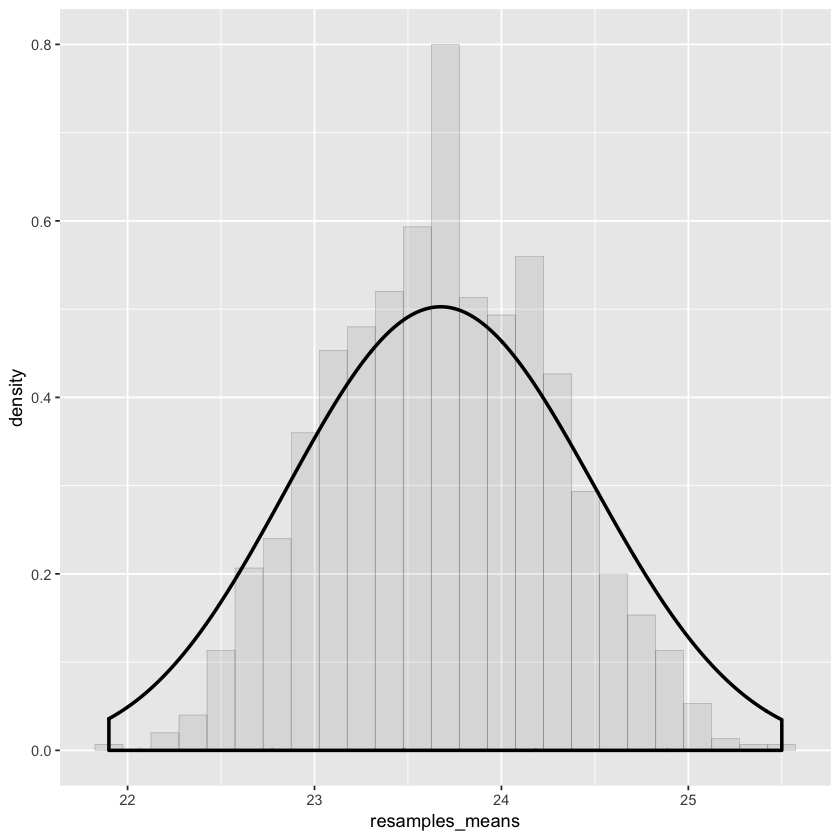

In [21]:
ggplot() + 
  geom_histogram(aes(x=resamples_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=resamples_means), color="black", size=1, bw=0.5)

## Plot 2018 vs 2021

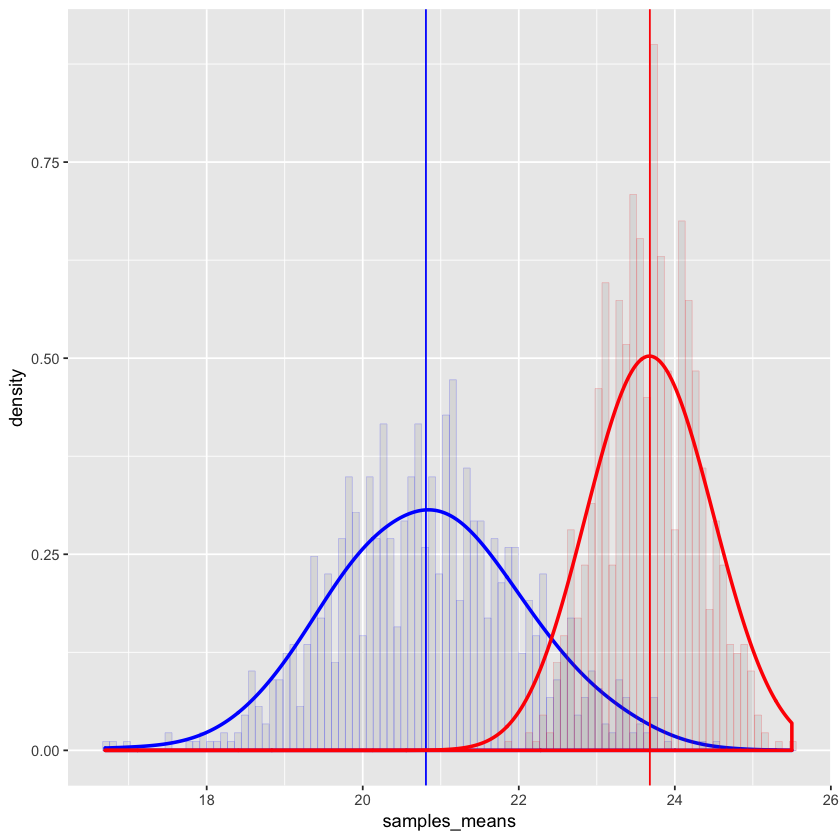

In [32]:
ggplot() + 
  geom_histogram(aes(x=samples_means, y=..density..), bins = 100, alpha=0.1, color="blue", size=0.05) +
    geom_density(aes(x=samples_means), color="blue", size=1, bw=0.5) +
    geom_vline(aes(xintercept=20.81), color="blue") +
    geom_histogram(aes(x=resamples_means, y=..density..), bins = 100, alpha=0.1, color="red", size=0.05) +
    geom_density(aes(x=resamples_means), color="red", size=1, bw=0.5) +
    geom_vline(aes(xintercept=23.68), color="red")

## T-Test

In [22]:
t.test(samples_means, resamples_means)


	Welch Two Sample t-test

data:  samples_means and resamples_means
t = -67.209, df = 1469.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.922838 -2.757062
sample estimates:
mean of x mean of y 
 20.84490  23.68485 


##### Since the p-value is less than 0.05, we reject the null hypothesis, therefore there is a significant difference between the 2018 data and the 2021 resample data.  This supports the hypothesis that an environmental stressor caused a decline in coral cover.  